In [ ]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

In [ ]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely
!pip install shapely --no-binary shapely

In [ ]:
import cartopy.crs as ccrs

Questionário do curso: https://forms.gle/SsdiZB3VNXJMTqCa9

# Aula 5 : Mapas

#### Material de apoio

- Documentação cartopy: https://scitools.org.uk/cartopy/docs/latest/
- NaturalEarth: conjunto de informações geográficas de acesso público:
    - https://www.naturalearthdata.com/downloads/
    ou
    - https://github.com/nilodna/natural-earth-vector/tree/master/packages/Natural_Earth_quick_start
- OpenStreetMap: iniciativa colaborativa para acesso livre à informações geográficas:
    - https://download.geofabrik.de/south-america/brazil.html

## O que é cartopy?

- processamento de dados geoespaciais
- mapas com alta qualidade
- jornais mundo afora
- controle dos elementos cartográficos

importano o cartopy

```python
import cartopy.crs as ccrs
```

### Criando geofiguras

- criar GeoAxes
- integra matplotlib e cartopy
- utilizando uma projeção
- Duas formas:



In [1]:
# linhas de códigos para evitar Warnings. Uso apenas para apresentações com o RISE para não ocupar espaço demais
# na tela.
import warnings
warnings.filterwarnings('ignore')

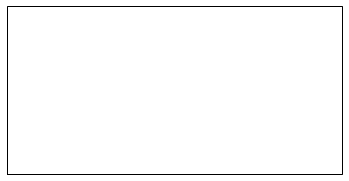

In [2]:
import matplotlib.pyplot as plt
# padrão de importação: crs é o core do pacote
import cartopy.crs as ccrs

%matplotlib inline

# modo 1:
fig = plt.figure()
ax = fig.add_subplot(projection=ccrs.PlateCarree())

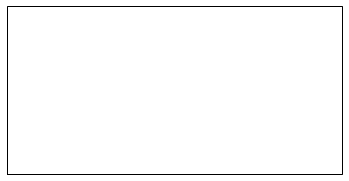

In [3]:
# modo 2:
fig,ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

### Principais métodos

- `ax.coastlines()`: inserir linha de costa
- `ax.set_global()`: ajusta limites geográficos para o globo
- `ax.set_extent()`: ajusta os limites geográficos para uma região
- `ax.stock_img()`: adiciona uma imagem padrão ao mapa de topografia e batimetria
- `ax.imshow()`: adiciona imagem personalizada ao mapa (imagens georreferenciadas)
- `ax.add_geometries()`: adiciona geometrias do shapely (pacote de leitura de shapefiles)
- `ax.gridlines()`: adiciona linhas de grade associadas às coordenadas

In [4]:
# Podemos criar uma função para retornar um mapa

def create_map(projection):
    fig,ax = plt.subplots(subplot_kw={'projection': projection})
    
    return fig,ax

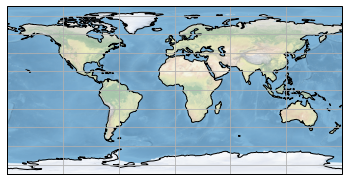

In [27]:
proj = ccrs.PlateCarree()

fig,ax = create_map(proj)

# adicionando linha de costa
ax.coastlines()

# adicionando gridline
ax.gridlines()

# adicionando imagem padrão
ax.stock_img()

### Projeção de mapas: problemas

- Terra não é plana
- projetar esfera em plano: distorção

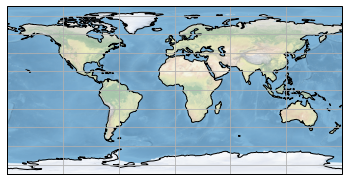

In [29]:
# Robinson, Mercator, Orthographic, InterruptedGoodeHomolosine

fig,ax = create_map(ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.gridlines()

### Criando um mapa regional

- área de estudo
- mapa da plataforma continental sudeste
- Unidade de Conservação do Arquipélago de Alcatrazes (ICMBio) 

In [7]:
import numpy as np
# importando diversos pacotes novos
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
# pacotes relacionados às funcionalidades do cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom

#### Primeiros passos

- determinar projeção
- limites geográficos
- google maps para auxiliar
    - canto inferior esquerdo
    - canto superior direito



In [30]:
# projecao
proj = ccrs.PlateCarree()

# posicao do canto inferior esquerdo
lower_lon = -50
lower_lat = -30

# posicao do canto superior direito
upper_lon = -41
upper_lat = -22

### Linha de costa

- padrão: NaturalEarth (1cm:10m)
- download feito automaticamente
- demora, mas depois fica rápido
- para mais conjuntos, visite: [Natural Earth](https://www.naturalearthdata.com/downloads/)

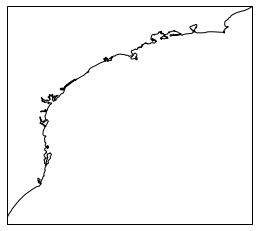

In [33]:
# montando uma lista para facilitar enviar para o GeoAxes os limites geográficos. 
extent = [lower_lon, upper_lon, lower_lat, upper_lat]
# criando mapa com a função 
fig,ax = create_map(ccrs.PlateCarree())
# alterando para os limites criados acima
ax.set_extent(extent)
# inserindo linha de costa com resolução de 1:110, teste com 10m e 50m
ax.coastlines('10m')

Dentre os conjuntos do NaturalEarth, podemos ainda utilizar:

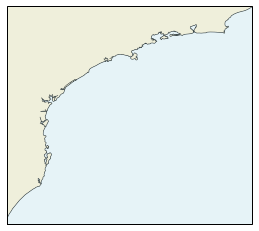

In [43]:
import cartopy.feature as cfeature

fig,ax = create_map(ccrs.PlateCarree())
ax.set_extent(extent)
ax.coastlines('10m')

coastline_10m = cfeature.NaturalEarthFeature(
    category='physical',name='coastline',scale='10m',
    facecolor=cfeature.COLORS['land'])

bathy_0m      = cfeature.NaturalEarthFeature(category='physical',name='bathymetry_L_0',scale='10m')

# inserting information over the map
ax.add_feature(coastline_10m, edgecolor='black', linewidth=0.05)
ax.add_feature(bathy_0m, facecolor='lightblue', alpha=.3)

criando uma função para auxiliar:

In [11]:
def make_map(fig=None, ax=None, extent=[-50,-41,-30,-22], projection=ccrs.PlateCarree()):
    """ 
    documente-a como exercício para entender a 
    ação de cada linha
    """
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    coastline_10m = cfeature.NaturalEarthFeature(
        category='physical',name='coastline',scale='10m',
        facecolor=cfeature.COLORS['land'])

    bathy_0m      = cfeature.NaturalEarthFeature(
        category='physical',name='bathymetry_L_0',scale='10m')

    # inserting information over the map
    ax.add_feature(coastline_10m, 
                   edgecolor='black',
                   linewidth=.1)
    ax.add_feature(bathy_0m,
                   facecolor='lightblue',
                   alpha=.3)
    
    return ax

Meridianos e Paralelos como grids

- .gridlines()
- limites geográficos como referência
- customizar: grossura, cor, transparencia, etc ...- 

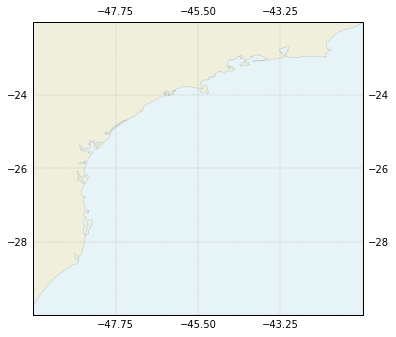

In [12]:
fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())

# criando as gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.4, color='gray', 
                  alpha=0.5, linestyle='--', 
                  xlocs=np.linspace(extent[0], extent[1], 5),
                  ylocs=np.linspace(extent[3], extent[2], 5))

Rótulos aparecem ao redor de todo o mapa, mas podemos customizar isso também!

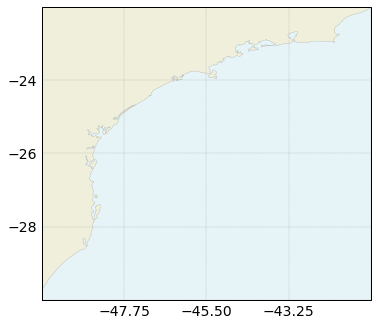

In [56]:
fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())

# criando as gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.4, color='gray', 
                  alpha=0.5, linestyle='--', 
                  xlocs=np.linspace(extent[0], extent[1], 5),
                  ylocs=np.linspace(extent[3], extent[2], 5))

gl.xlabels_top = False
gl.ylabels_right = False

# dicionario com configurações dos rótulos
dict_style_labels = {'color': 'black', 'fontsize': 14}

gl.ylabel_style = dict_style_labels
gl.xlabel_style = dict_style_labels

Vamos criar uma segunda função, para configurar o mapa em termo de meridianos e paralelos:

In [58]:
def configuring_map(ax, extent):
    # criando as gridlines 
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=.4, color='gray', 
                      alpha=0.5, linestyle='--', 
                      xlocs=np.linspace(extent[0], extent[1], 5),
                      ylocs=np.linspace(extent[3], extent[2], 5))

    gl.xlabels_top = False
    gl.ylabels_right = False

    # dicionario com configurações dos rótulos
    dict_style_labels = {
        'color': 'black',
        'fontsize': 12
    }

    gl.ylabel_style = dict_style_labels
    gl.xlabel_style = dict_style_labels

Notem que:

- duas funções capazes de criar um mapa para qualquer lugar no globo
- podemos começar a pensar em criar nossas próprias coleções de funções, para não nos repetirmos!


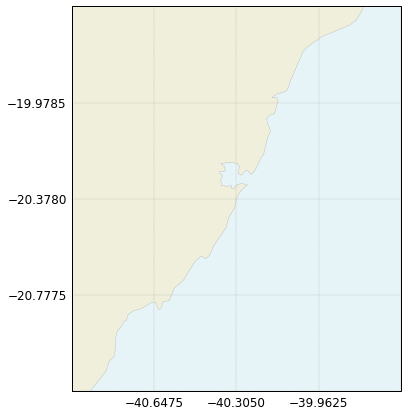

In [59]:
# mapa Espirito Santo (centrado em Vitória)
lower = [-40.99, -21.177]
upper = [-39.62, -19.579]
extent2 = [lower[0], upper[0], lower[1], upper[1]]

fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax = make_map(fig=fig, ax=ax, extent=extent2, projection=ccrs.PlateCarree())
configuring_map(ax, extent=extent2)

Unidade de Conservação

- estabelecer limites geográficos para criar minimapa
- inserir polígono indicando aonde iremos dar zoom no mapa
    - `shapely`

In [ ]:
import shapely.geometry as sgeom

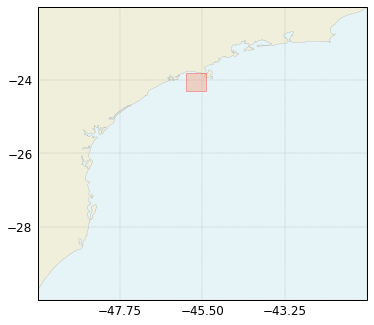

In [60]:
# coordenadas geográficas do limite do minimapa
lower = [-24.3, -45.949]
upper = [-23.8, -45.4]
extent_UC = [lower[1], upper[1], lower[0], upper[0]]
# usando um método novo do matplotlib, criamos um polígono

extent_box = sgeom.box(extent_UC[0], extent_UC[2], extent_UC[1], extent_UC[3])

# plotando mapa
fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())
configuring_map(ax, extent)
_ = ax.add_geometries([extent_box], ccrs.PlateCarree(), 
                      facecolor='coral', # cor do polígono
                      edgecolor='red',   # cor das arestas
                      alpha=.3)          # transparência

### Inserindo minimapa

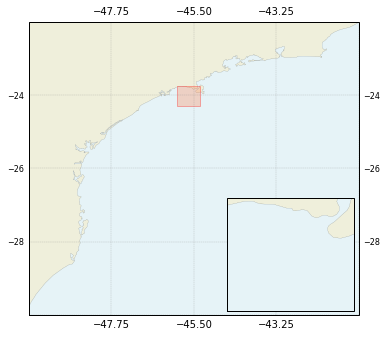

In [17]:
# coordenadas geográficas do limite do minimapa
lower,upper = [-24.3, -45.949], [-23.74, -45.32]
extent_UC = [lower[1], upper[1], lower[0], upper[0]]
# usando um método novo do matplotlib, criamos um polígono
extent_box = sgeom.box(extent_UC[0], extent_UC[2], extent_UC[1], extent_UC[3])
# plotando mapa
fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())
configuring_map(ax, extent)
_ = ax.add_geometries([extent_box], ccrs.PlateCarree(), 
                      facecolor='coral', # cor do polígono
                      edgecolor='red',   # cor das arestas
                      alpha=.3)          # transparência
# setting axes position and size
left,bottom   = 0.465, 0.25
width, height  = 0.55, 0.20
rect = [left,bottom,width,height]

# creating axes 2 for minimap
ax2 = plt.axes(rect, projection=ccrs.PlateCarree())
ax2 = make_map(fig=fig, ax=ax2, extent=extent_UC)

plt.savefig('tmp_map.png', dpi=150)

### Lendo shapefiles com cartopy.shapereader

In [18]:

def criando_mapa(extent):
    # coordenadas geográficas do limite do minimapa
    lower = [-24.3, -45.949]
    upper = [-23.74, -45.32]
    extent_UC = [lower[1], upper[1], lower[0], upper[0]]
    # usando um método novo do matplotlib, criamos um polígono
    extent_box = sgeom.box(extent_UC[0], extent_UC[2], extent_UC[1], extent_UC[3])
    
    # plotando mapa
    fig = plt.figure(figsize=(15/2.54,20/2.54))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())
    configuring_map(ax, extent)
    _ = ax.add_geometries([extent_box], ccrs.PlateCarree(), 
                          facecolor='coral', # cor do polígono
                          edgecolor='red',   # cor das arestas
                          alpha=.3)          # transparência

    # setting axes position and size
    left,bottom   = 0.465, 0.25
    width, height  = 0.55, 0.20
    rect = [left,bottom,width,height]

    # creating axes 2 for minimap
    ax2 = plt.axes(rect, projection=ccrs.PlateCarree())
    ax2 = make_map(fig=fig, ax=ax2, extent=extent_UC)
    
    return fig,ax,ax2


In [65]:
# execute a linha de comando abaixo para fazer download do conjunto de dados que serão utilizados
!wget --directory-prefix=../Dados/ https://github.com/LuizaPS/MinicursoPython_AbmGeo/tree/main/Dados/OSM/OSM_BRA_coastline/lines.shp
!wget --directory-prefix=../Dados/ https://github.com/LuizaPS/MinicursoPython_AbmGeo/tree/main/Dados/OSM/OSM_BRA_land/land.shp
!wget --directory-prefix=../Dados/ https://github.com/LuizaPS/MinicursoPython_AbmGeo/tree/main/Dados/alcatrazes/alcatrazes.shp

--2021-11-26 16:14:12--  https://github.com/LuizaPS/MinicursoPython_AbmGeo/tree/main/Dados/OSM/OSM_BRA_coastline/lines.shp
Resolvendo github.com (github.com)... 20.201.28.151
Conectando-se a github.com (github.com)|20.201.28.151|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 301 Moved Permanently
Localização: https://github.com/LuizaPS/MinicursoPython_AbmGeo/blob/main/Dados/OSM/OSM_BRA_coastline/lines.shp [redirecionando]
--2021-11-26 16:14:12--  https://github.com/LuizaPS/MinicursoPython_AbmGeo/blob/main/Dados/OSM/OSM_BRA_coastline/lines.shp
Reaproveitando a conexão existente para github.com:443.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: não especificada [text/html]
Salvando em: “../Dados/lines.shp”

lines.shp               [ <=>                ] 159,01K  --.-KB/s    em 0,07s   

2021-11-26 16:14:13 (2,10 MB/s) - “../Dados/lines.shp” salvo [162831]

--2021-11-26 16:14:13--  https://github.com/LuizaPS/MinicursoPython_AbmGeo/tree/mai

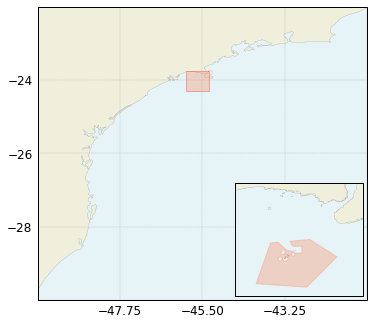

In [62]:
# criei uma função temporaria para facilitar a visualização
fig,ax,ax2 = criando_mapa(extent)

# adicionando linha de costa do OpenStreetMap
line = shpreader.Reader('../Dados/OSM/OSM_BRA_coastline/lines.shp')
ax2.add_geometries(line.geometries(), ccrs.PlateCarree(), facecolor='none',edgecolor='black',linewidth=.05)

# adicionando continente do OpenStreetMap
land = shpreader.Reader('../Dados/OSM/OSM_BRA_land/land.shp')
ax2.add_geometries(land.geometries(), ccrs.PlateCarree(),facecolor=cfeature.COLORS['land'],edgecolor='black',linewidth=0.05)

# adicionando área da unidade de conservação (terra e água)
ucs = shpreader.Reader('../Dados/alcatrazes/alcatrazes.shp')
ax2.add_geometries(ucs.geometries(), ccrs.PlateCarree(),facecolor='coral',alpha=.3,edgecolor='coral')

plt.savefig('tmp_map.png', dpi=150)

Como temos tudo elaborado, transformei o bloco de códigos para inserir o minimapa de Alcatrazes em uma função que chamei de: create_alcatrazes(ax) para facilitar.

In [63]:
def create_alcatrazes(ax):

    # coordenadas geográficas do limite do minimapa
    lower_lat = -24.3
    lower_lon = -45.949
    upper_lat = -23.74
    upper_lon = -45.32

    extent_UC = [lower_lon, upper_lon, lower_lat, upper_lat]

    # usando um método novo do matplotlib, criamos um polígono
    extent_box = sgeom.box(extent_UC[0], extent_UC[2], 
                           extent_UC[1], extent_UC[3])

    # adicionando polígono no mapa
    ax.add_geometries([extent_box], ccrs.PlateCarree(), 
                      facecolor='coral', # cor do polígono
                      edgecolor='red',   # cor das arestas
                      alpha=.3)          # transparência

    # setting axes position and size
    left   = 0.465
    bottom = 0.25
    width  = 0.55
    height = 0.20

    rect = [left,bottom,width,height]

    # creating axes 2 for minimap
    ax2 = plt.axes(rect, projection=ccrs.PlateCarree())
    ax2 = make_map(fig=fig, ax=ax2, extent=extent_UC)

    # adicionando linha de costa do OpenStreetMap
    line = shpreader.Reader('../Dados/OSM/OSM_BRA_coastline/lines.shp')
    ax2.add_geometries(line.geometries(), ccrs.PlateCarree(),facecolor='none',edgecolor='black',linewidth=.05)

    # adicionando continente do OpenStreetMap
    land = shpreader.Reader('../Dados/OSM/OSM_BRA_land/land.shp')
    ax2.add_geometries(land.geometries(), ccrs.PlateCarree(),facecolor=cfeature.COLORS['land'],edgecolor='black',linewidth=0.05)

    # adicionando área da unidade de conservação (terra e água)
    ucs = shpreader.Reader('../Dados/alcatrazes/alcatrazes.shp')
    ax2.add_geometries(ucs.geometries(), ccrs.PlateCarree(),facecolor='coral',alpha=.3,edgecolor='coral')
    
    return ax2



### Inserindo localizações com scatter

- dicionário com informações para plotar
- estações meteorológicas, fundeios, etc 

In [22]:
# criando dicionário com os locais e metadados

insitu = {
    'simcosta-css': {
        'coords': (-23.831, -45.423), # lat,lon
        'marker': 's',
        'color': 'purple',
        'label': 'SiMCosta - SP',
        'minimap': True # plotar no minimapa?
    },
    
    'simcosta-rj': {
        'coords': (-22.967, -43.131),
        'marker': 's',
        'color': 'green',
        'label': 'SiMCosta - RJ',
        'minimap': False
    },
    
    'base-ubatuba': {
        'coords': (-23.499, -45.119),
        'marker': 'o',
        'color': 'k',
        'label': 'Base Ubatuba (IOUSP)',
        'minimap': False
        
    },
    'base-cananeia': {
        'coords': (-25.02, -47.925),
        'marker': 'o',
        'color': 'r',
        'label': u'Base Cananéia (IOUSP)',
        'minimap': False
    }
}


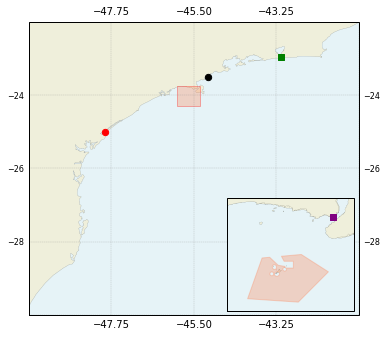

In [23]:
# código completo
# projecao
proj = ccrs.PlateCarree()
lower_lon, lower_lat = -50, -30
upper_lon, upper_lat = -41, -22
extent = [lower_lon, upper_lon, lower_lat, upper_lat]
# criando a base do mapa:
fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())
configuring_map(ax, extent)
# inserindo o minimapa completo
ax2 = create_alcatrazes(ax)

# inserindo marcadores de pontos de observação
for local,metadados in insitu.items():
    # extraindo metadados
    lat,lon = metadados['coords']
    marker = metadados['marker']
    color = metadados['color']
    label = metadados['label']
    
    # varia o ax_plot de acordo com o mapa que deve exibir a informação
    if metadados['minimap']:
        ax_plot = ax2
    else:
        ax_plot = ax
        
    ax_plot.scatter(lon, lat, s=40, marker=marker, color=color, label=label, zorder=50)

plt.savefig('mapa_alcatrazes.png', dpi=150)

## Vamos fazer juntas!

Vamos utilizar o conjunto de informações da última aula: do IBAMA com informações sobre as manchas de óleo de 2019!

In [52]:
# importanto pacotes
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline

### Leitura de arquivo excel

Use o url para a leitura do arquivo:

http://www.ibama.gov.br/phocadownload/emergenciasambientais/2019/manchasdeoleo/2019-12-02_LOCALIDADES_AFETADAS.xlsx

Dica: comando do pandas para ler arquivo excel é: `pd.read_excel`

In [38]:
import pandas as pd

In [39]:
######################
# leitura do arquivo
url = "http://www.ibama.gov.br/phocadownload/emergenciasambientais/2019/manchasdeoleo/2019-12-02_LOCALIDADES_AFETADAS.xlsx"
df = pd.read_excel( url,
                    parse_dates=["Data_Avist", "Data_Revis"]
                  )
df.head()

,geocodigo,localidade,loc_id,municipio,estado,sigla_uf,Data_Avist,Data_Revis,Status,Latitude,Longitude
0,3201605,Praia de Guriri,3201605_43,Conceição da Barra,Espírito Santo,ES,2019-11-23,2019-11-23,Oleada - Vestigios / Esparsos,"18° 40' 43.70"" S","39° 44' 33.69"" W"
1,3201605,Praia de Guriri,3201605_46,Conceição da Barra,Espírito Santo,ES,2019-11-18,2019-11-19,Oleada - Vestigios / Esparsos,"18° 42' 14.87"" S","39° 44' 45.92"" W"
2,3201605,Praia de Guriri,3201605_45,Conceição da Barra,Espírito Santo,ES,2019-11-21,2019-11-27,Oleada - Vestigios / Esparsos,"18° 41' 54.57"" S","39° 44' 40.31"" W"
3,2207702,Praia do Pontal,2207702_4,Parnaíba,Piauí,PI,2019-11-08,2019-11-17,Oleada - Vestigios / Esparsos,"2° 45' 46.58"" S","41° 46' 54.03"" W"
4,3202405,Praia do Morro,3202405_39,Guarapari,Espírito Santo,ES,2019-11-28,2019-11-28,Oleada - Vestigios / Esparsos,"20° 39' 18.19"" S","40° 28' 42.74"" W"


### Limpeza e ajustes do conjunto de dados

Vamos relembrar como calcular o tempo de permanêcia da mancha:

Data de Revista - Data de Avistagem

- como fazemos uma operação numérica no pandas?

- queremos o resultado em dias, mas em float

In [ ]:
(df["Data_Revis"] - df["Data_Avist"])

In [ ]:
(df["Data_Revis"] - df["Data_Avist"]).dt.days

In [ ]:
# Calculando o tempo de permanência da mancha em cada localidade
df["dias"] = (df["Data_Revis"] - df["Data_Avist"]).dt.days

In [40]:
######################
# Calculando o tempo de permanência da mancha em cada localidade
df["dias"] = (df["Data_Revis"] - df["Data_Avist"]).dt.days

# tratando as colunas de tempo
df['Data_Avist'] = df['Data_Avist'].dt.strftime('%Y-%m-%d').str.replace('NaT', 'na')
df["Data_Revis"] = df["Data_Revis"].dt.strftime("%Y-%m-%d").str.replace("NaT", "na")
df["dias"] = df["dias"].astype(float)

df.dropna(inplace=True)

Vamos relembrar como filtrar o DataFrame para ficar apenas com os dados em que o óleo foi observado.

- vamos relembrar os operadores lógicos!

- como faz um filtro dentro do pandas mesmo?

In [ ]:
df['Status'] == 'Oleo Nao Observado'

In [ ]:
# removendo linhas onde o status == nao observado
filtr = (df['Status'] == 'Oleo Nao Observado')
df = df[~filtr].copy()

In [ ]:
df['dias'] == 0

In [ ]:
# removendo registros onde o dias == 0
filtr = (df['dias'] == 0)
df = df[~filtr].copy()

In [24]:
######################
# um pouco de limpeza de dados (data cleaning)

# removendo linhas onde o status == nao observado
filtr = (df['Status'] == 'Oleo Nao Observado')
df = df[~filtr].copy()

# removendo registros onde o dias == 0
filtr = (df['dias'] == 0)
df = df[~filtr].copy()

NameError: name 'df' is not defined

### Qual o Estado mais afetado segundo o conjunto de dados?

- Quem lembra como usa o goupby?

- Quem lembra como usa o goupby?
    - precisa usa usa uma operação matematica junto
    - vamos usar o count() para contar!
    - será que ja conseguimos plotar direto na mesma linha?

In [ ]:
df.groupby('sigla_uf').count()['estado']

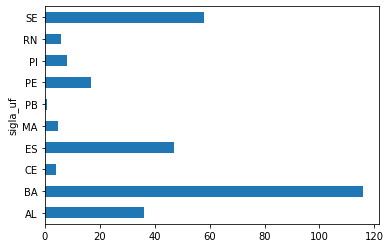

In [42]:
######################
# Estado mais afetado
df.groupby('sigla_uf').count()['estado'].plot(kind='barh')

### Agrupe por Município e apresente quais foram os 10 mais afetados

- Vamos usar o grupby de novo! 

Dica: Lembram do comando `.head()` do DataFrame, usem ele para selecionar os 10 primeros

In [43]:
######################
# Município mais afetado
df.groupby('municipio').count()\
        .sort_values(by='Data_Revis', 
                     ascending=False)\
        .head(10)

,geocodigo,localidade,loc_id,estado,sigla_uf,Data_Avist,Data_Revis,Status,Latitude,Longitude,dias
municipio,,,,,,,,,,,
São Mateus,21,21,21,21,21,21,21,21,21,21,21
Aracaju,19,19,19,19,19,19,19,19,19,19,19
Ilhéus,18,18,18,18,18,18,18,18,18,18,18
Conceição da Barra,16,16,16,16,16,16,16,16,16,16,16
Estância,14,14,14,14,14,14,14,14,14,14,14
Prado,12,12,12,12,12,12,12,12,12,12,12
Maraú,12,12,12,12,12,12,12,12,12,12,12
Barra dos Coqueiros,11,11,11,11,11,11,11,11,11,11,11
Entre Rios,9,9,9,9,9,9,9,9,9,9,9


### Qual a localidade afetada por mais tempo?

- Mesma coisa que o anterior, vamos usar o grupby de novo! 

Dica: A dica aqui é usar o `.sum()` para somar os dias que a localidade foi afetada!

In [44]:
######################
# praias afetadas por mais tempo
df.groupby(by='localidade').sum().sort_values('dias', ascending=False) #.head(5)

,geocodigo,dias
localidade,,
Praia da Costa,14320119,148.0
Atalaia,5006014,113.0
Praia de Flexeiras,10810808,108.0
Praia de Jatobá,8401815,97.0
Atalaia Nova,2800605,90.0
...,...,...
Ponta do Corumbau,2925303,1.0
Barra de Peso e praia do Joabe,2903409,1.0
Praia do Bugigão em Caraíva,2925501,1.0


E para plotar esse resultado num gráfico de barras, como fazemos?

vamos plotar as 10 primeiras localidades mais afetadas!

Dica1: use o `.iloc[]`

Dica2: Da para plotar direto do pandas!

Dica3: Podemos mesclar pandas com matplotlib para encrementar o gráfico!

In [26]:
df.groupby(by='localidade').sum().sort_values('dias', ascending=False).iloc[:10]['dias']

localidade
Praia da Costa        148.0
Atalaia               113.0
Praia de Flexeiras    108.0
Praia de Jatobá        97.0
Atalaia Nova           90.0
Praia do Janga         88.0
Praia de Tambaba       88.0
Praia do Amor          83.0
Pau Amarelo            83.0
Praia de Aruanã        83.0
Name: dias, dtype: float64

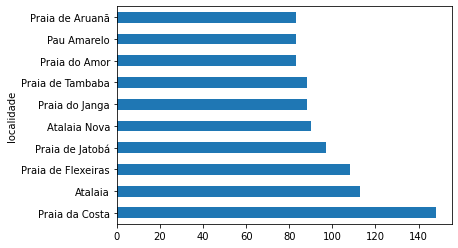

In [45]:
######################
df.groupby(by='localidade').sum().sort_values('dias', ascending=False).iloc[:10]['dias'].plot(kind='barh')

In [25]:
######################
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15,6))
ax = df.groupby(by='localidade').sum().sort_values('dias', ascending=False).iloc[:10]['dias'].plot(kind='barh')

ax.set_title('Top 10 praias afetadas pelas manchas de óleo em 2019', y=1.05)

NameError: name 'df' is not defined

<Figure size 1080x432 with 0 Axes>

### Vamos fazer um mapa indicando os Estados mais afetados, utilizando como marker='o' (uma bola) e essa bola deve variar de tamanho segundo a quantidade de regiões atingidas apenas.

- Para auxiliar, é necessário converter o formato de latitude e longitude presente no dataframe. Para isso, use a função abaixo, obtida com o Filipe Fernandes e insira essa função usando o método .apply() do pandas para converter.

In [47]:
######################
def fix_pos(pos):
    # source: https://gist.github.com/ocefpaf/60bec6fbd252107de11073376bad7925
    deg, rest = pos.split("°")
    mi, rest = rest.strip().split("'")
    sec, hem = rest.strip().split('"')
    hem = hem.strip()

    deg, mi, sec = map(float, (deg, mi, sec))
    if hem in ["S", "W"]:
        sign = -1
    elif hem in ["N", "E"]:
        sign = +1
    else:
        raise ValueError(f"Unrecognized sign {sign}, expected 'S', 'W', 'E', or 'N'")

    return sign * (deg + mi/60 + sec/60/60)

In [48]:
######################
# necessário tratar as colunas de Latitude e Longitude
df['lat'] = df['Latitude'].apply(fix_pos)
df['lon'] = df['Longitude'].apply(fix_pos)

Dica: edite as funções que criamos hoje, para se adequar aos casos

In [52]:
######################
def make_map(fig=None, ax=None, extent=[-50,-41,-30,-22], projection=ccrs.PlateCarree()):
    """ 
    documente-a como exercício para entender a 
    ação de cada linha
    """
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    coastline_10m = cfeature.NaturalEarthFeature(
        category='physical',name='coastline',scale='10m',
        facecolor=cfeature.COLORS['land'])

    bathy_0m      = cfeature.NaturalEarthFeature(
        category='physical',name='bathymetry_L_0',scale='10m')

    # inserting information over the map
    ax.add_feature(coastline_10m, 
                   edgecolor='black',
                   linewidth=.1)
    ax.add_feature(bathy_0m,
                   facecolor='lightblue',
                   alpha=.3)
    
    return ax

In [53]:
######################
def configuring_map(ax, extent):
    # criando as gridlines 
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=.4, color='gray', 
                      alpha=0.5, linestyle='--', 
                      xlocs=np.linspace(extent[0], extent[1], 5),
                      ylocs=np.linspace(extent[3], extent[2], 5))

    gl.top_labels = False
    gl.right_labels = False

    # dicionario com configurações dos rótulos
    dict_style_labels = {
        'color': 'black',
        'fontsize': 8
    }

    gl.ylabel_style = dict_style_labels

In [54]:
######################
#----- visualizando -----#
extent = [-45.949, -30, -20, 0] # regiao brasileira

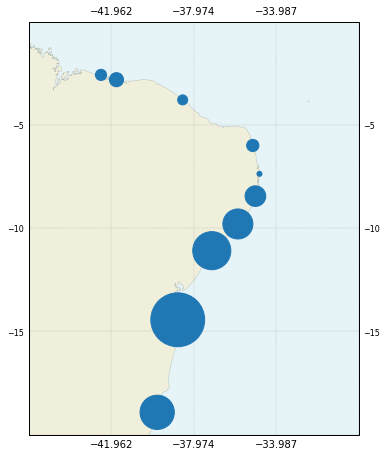

In [55]:
######################
states = df.groupby('sigla_uf').count()
states['lat'] = df.groupby('sigla_uf').mean()['lat']
states['lon'] = df.groupby('sigla_uf').mean()['lon']
# (tamanho padrão de algumas revistas)
fig = plt.figure(figsize=(15/2.54,20/2.54)) # em polegadas 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())
configuring_map(ax, extent=extent)
ax.scatter(states['lon'].values, states['lat'].values, 
           s=states['geocodigo'].values*25,  # o pulo do gato para variar o tamanho dos scatter
           zorder=50)
plt.savefig('exoleo_estados.png', dpi=150)

### Vamos selecionar uma das regiões acima e reproduzir um mapa mais detalhado, indicando as praias que foram atingidas. Tente variar as cores dos marcadores segundo a evolução temporal: primeira afetada com uma cor e varia até a cor da última afetada.

Podemos criar uma função para extrair a informação de UF do dataframe!

Então vamos por parte!

O que fazer primeiro?

- filtrar o DataFrame por estado

In [ ]:
df_por_estado = df[df['sigla_uf'] == uf]

Podemos criar uma função para extrair a informação de UF do dataframe!

Então vamos por parte!

O que fazer primeiro?

- filtrar o DataFrame por estado - check
- definir limites geográfico com base nas localidades do estado selecionado

In [ ]:
# limites geográficos com base no estado selecionado
llon,ulon = df_por_estado['lon'].min(), df_por_estado['lon'].max()
llat,ulat = df_por_estado['lat'].min(), df_por_estado['lat'].max()

In [ ]:
extent = [llon-0.05, ulon+0.05, llat-0.02, ulat+0.02]

**Vamos criar um função com esses comando que retorne um DataFrame do estado selecionado e os limites de extenssão para o nosso mapa**

In [56]:
######################
def extrair_info_UF(df, uf='AL'):
    df_por_estado = df[df['sigla_uf'] == uf]
    
    # limites geográficos com base no estado selecionado
    llon,ulon = df_por_estado['lon'].min(), df_por_estado['lon'].max()
    llat,ulat = df_por_estado['lat'].min(), df_por_estado['lat'].max()
    
    extent = [llon-0.05, ulon+0.05, llat-0.02, ulat+0.02]
    
    return df_por_estado, extent

Boa! Agora ficou fácil, selecionar o estado! Só falta fazer o plot!

Vamos fazer uma soma cumulativa para das localidades para indicar no gáfico as regiões mais afetadas!

- Dica: `.groupby()` e `.cumsum()`

In [ ]:
df_alagoas = alagoas.groupby('localidade').cumsum().copy()

Agora é só plotar usando o `matplotlib` e a nossa função `make_map`

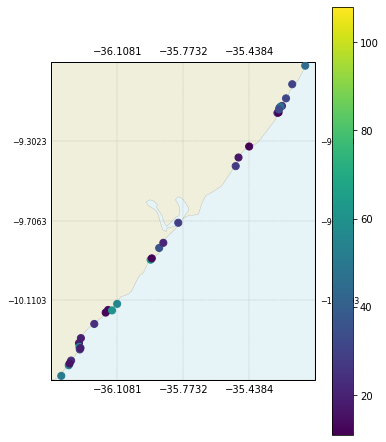

In [58]:
######################
# Alagoas
alagoas,ext_alagoas = extrair_info_UF(df, uf='AL')
df_alagoas = alagoas.groupby('localidade').cumsum().copy()
fig = plt.figure(figsize=(15/2.54,20/2.54)) # em polegadas (tamanho padrão de algumas revistas)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=ext_alagoas, projection=ccrs.PlateCarree())
configuring_map(ax, extent=ext_alagoas)
cf = ax.scatter(df_alagoas['lon'], df_alagoas['lat'],
                s=50, zorder=20,
                c=df_alagoas['dias'])

plt.colorbar(cf)
plt.savefig('exoleo_alagoas.png', dpi=150)

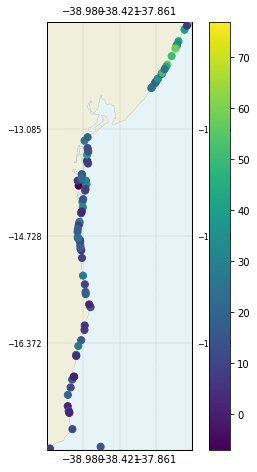

In [80]:
# Bahia
estado,ext_estado = extrair_info_UF(df, uf='BA')
df_estado = estado.groupby('localidade').cumsum().copy()
fig = plt.figure(figsize=(15/2.54,20/2.54)) # em polegadas (tamanho padrão de algumas revistas)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=ext_estado, projection=ccrs.PlateCarree())
configuring_map(ax, extent=ext_estado)
cf = ax.scatter(df_estado['lon'], df_estado['lat'],
                s=50, zorder=20,
                c=df_estado['dias'])

plt.colorbar(cf)
plt.savefig('exoleo_bahia.png', dpi=150)

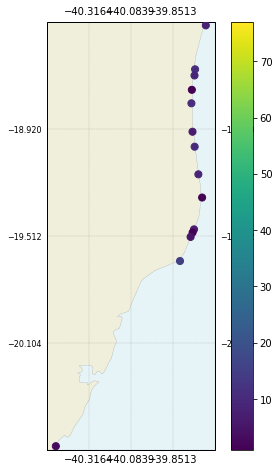

In [81]:
# Espirito Santo
estado,ext_estado = extrair_info_UF(df, uf='ES')
df_estado = estado.groupby('localidade').cumsum().copy()
fig = plt.figure(figsize=(15/2.54,20/2.54)) # em polegadas (tamanho padrão de algumas revistas)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=ext_estado, projection=ccrs.PlateCarree())
configuring_map(ax, extent=ext_estado)

cf = ax.scatter(df_estado['lon'], df_estado['lat'],
                s=50, zorder=20,
                c=df_estado['dias'])

plt.colorbar(cf)
plt.savefig('exoleo_espiritosanto.png', dpi=150)

**Que tal fazer um for para plotar e salvar figuras como essa de todos os estados?**

In [68]:
set(df['sigla_uf'])

{'AL', 'BA', 'CE', 'ES', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'}

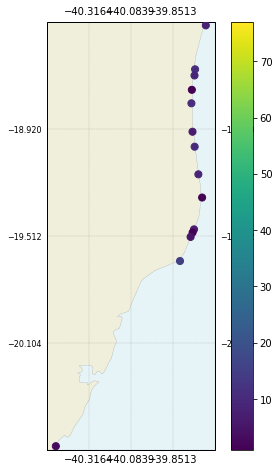

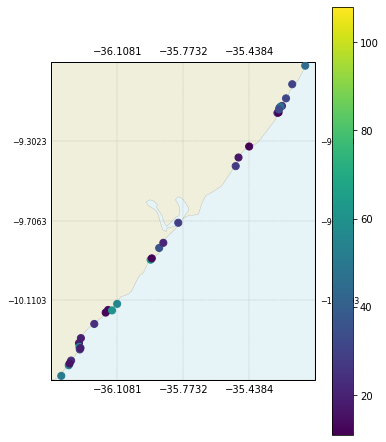

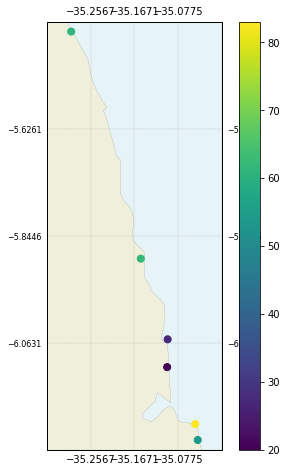

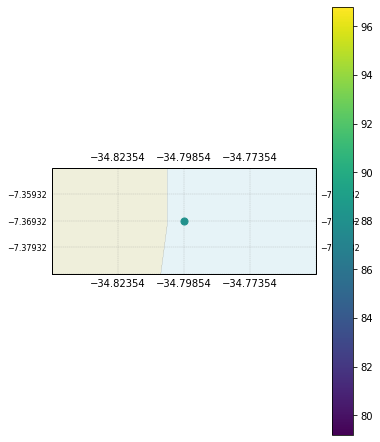

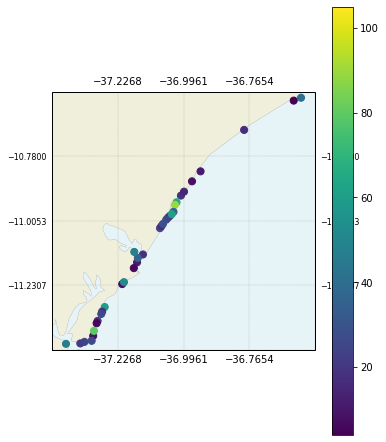

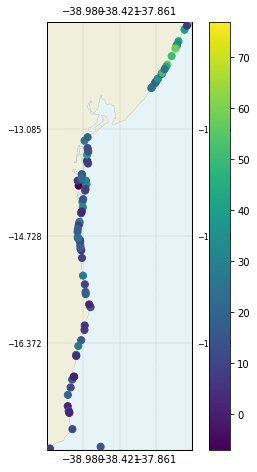

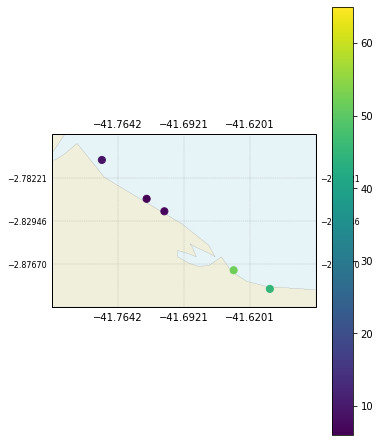

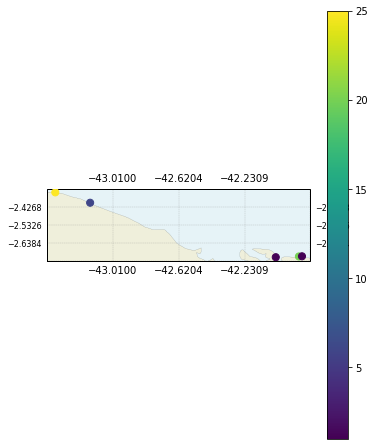

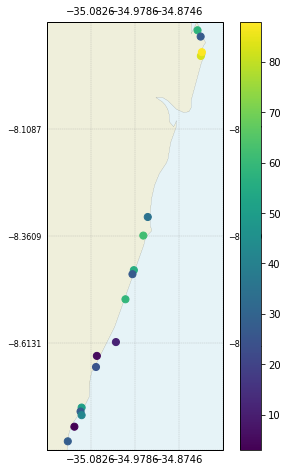

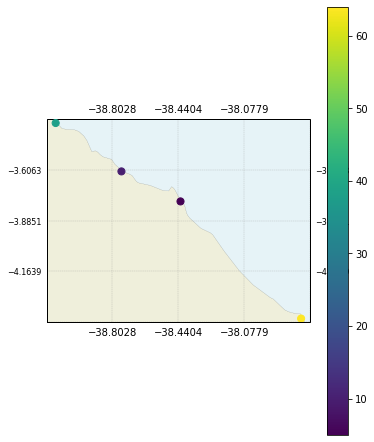

In [71]:
######################
for uf in set(df['sigla_uf']):
    estado,ext_estado = extrair_info_UF(df, uf=uf)
    df_estado = estado.groupby('localidade').cumsum().copy()
    fig = plt.figure(figsize=(15/2.54,20/2.54)) # em polegadas (tamanho padrão de algumas revistas)
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax = make_map(fig=fig, ax=ax, extent=ext_estado, projection=ccrs.PlateCarree())
    configuring_map(ax, extent=ext_estado)
    cf = ax.scatter(df_estado['lon'], df_estado['lat'],
                    s=50, zorder=20,
                    c=df_estado['dias'])

    plt.colorbar(cf)
    plt.savefig(f'exoleo_{uf}.png', dpi=150)

Também poderiamos fazer essas figura juntas usando um sobplot de 2 colunas e 5 linhas!

### Utilizando a coluna "dias" do dataframe e vamos refazer o mapa 1), mas agora variando o tamanho dos marcadores segundo o tempo de permanência somado dos Estados. Para isso use o agrupamento do pandas com o método `.sum()`.

Vamos agrupar por estado!

`.groupby().sum()`

In [ ]:
states = df.groupby('sigla_uf').sum()

Para a localização geográfica que tal usarmos uma lat e uma lon média para as localidades dos estados?

In [ ]:
states['lat'] = df.groupby('sigla_uf').mean()['lat']
states['lon'] = df.groupby('sigla_uf').mean()['lon']

Agora é plotar!

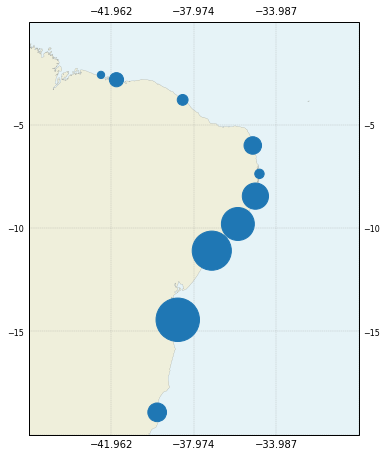

In [73]:
######################
# Estado mais afetado
states = df.groupby('sigla_uf').sum()
states['lat'] = df.groupby('sigla_uf').mean()['lat']
states['lon'] = df.groupby('sigla_uf').mean()['lon']
fig = plt.figure(figsize=(15/2.54,20/2.54)) # em polegadas (tamanho padrão de algumas revistas)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())
configuring_map(ax, extent=extent)
ax.scatter(states['lon'].values, states['lat'].values, 
           s=states['dias'].values,  # o pulo do gato para variar o tamanho dos scatter
           zorder=50)